# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]-273.15
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#print(json.dumps(city_weather, indent = 4, sort_keys= True))
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abengourou
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | suruc
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | smithers
Processing Record 10 of Set 1 | la'ie
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | elizabethtown
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | toga village
City not found. Skipping...
Processing Record 16 of Set 1 | kamiiso
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | mammoth lakes
Processing Record 21 of Se

Processing Record 39 of Set 4 | lihue
Processing Record 40 of Set 4 | dickinson
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | sovetskiy
Processing Record 43 of Set 4 | taroa
Processing Record 44 of Set 4 | fale old settlement
Processing Record 45 of Set 4 | jolo
Processing Record 46 of Set 4 | valdivia
Processing Record 47 of Set 4 | kodok
City not found. Skipping...
Processing Record 48 of Set 4 | coahuayana de hidalgo
Processing Record 49 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 0 of Set 5 | fort bragg
Processing Record 1 of Set 5 | mount darwin
Processing Record 2 of Set 5 | el nido
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | acapulco de juarez
Processing Record 5 of Set 5 | 'alaqahdari dishu
Processing Record 6 of Set 5 | vytegra
Processing Record 7 of Set 5 | uba
Processing Record 8 of Set 5 | berdigestyakh
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | tralee
Process

Processing Record 29 of Set 8 | alo
Processing Record 30 of Set 8 | batac city
Processing Record 31 of Set 8 | salekhard
Processing Record 32 of Set 8 | jayapura
Processing Record 33 of Set 8 | suining
Processing Record 34 of Set 8 | vermillion
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | flagstaff
Processing Record 37 of Set 8 | chipinge
Processing Record 38 of Set 8 | tabriz
Processing Record 39 of Set 8 | hemsby
Processing Record 40 of Set 8 | mar del plata
Processing Record 41 of Set 8 | yanam
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | chernyshevskiy
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | anonang
Processing Record 46 of Set 8 | sacele
Processing Record 47 of Set 8 | burhar
Processing Record 48 of Set 8 | toktogul
Processing Record 49 of Set 8 | kielce
Processing Record 0 of Set 9 | ponta delgada
Processing Record 1 of Set 9 | sebastopol
Processing Record 2 of Set 9 | kulhudhuffushi
Proces

Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | talakan
Processing Record 22 of Set 12 | vylkove
Processing Record 23 of Set 12 | popondetta
Processing Record 24 of Set 12 | piti village
Processing Record 25 of Set 12 | rabaul
Processing Record 26 of Set 12 | andergrove
Processing Record 27 of Set 12 | taroudant
Processing Record 28 of Set 12 | bushehr
Processing Record 29 of Set 12 | outjo
Processing Record 30 of Set 12 | usinsk
Processing Record 31 of Set 12 | huangshan
Processing Record 32 of Set 12 | sequeira
Processing Record 33 of Set 12 | wotho
Processing Record 34 of Set 12 | namibe
Processing Record 35 of Set 12 | al qusayr
Processing Record 36 of Set 12 | al marsa
Processing Record 37 of Set 12 | leava
Processing Record 38 of Set 12 | san carlos
Processing Record 39 of Set 12 | klyuchi
Processing Record 40 of Set 12 | krutinka
Processing Record 41 of Set 12 | sur
Processing Record 42 of Set 12 | saldanha
Processing Record 43 of Set 12 | chernyshevsk

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abengourou,6.7297,-3.4964,27.10,72,100,2.35,CI,1712693879
1,whitehorse,60.7161,-135.0538,4.06,44,67,5.36,CA,1712693492
2,adamstown,-25.0660,-130.1015,23.60,79,37,2.83,PN,1712693694
3,tolanaro,-25.0319,46.9987,23.88,96,61,3.93,MG,1712693858
4,codrington,-38.2667,141.9667,13.27,82,100,3.22,AU,1712693854


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abengourou,6.7297,-3.4964,27.10,72,100,2.35,CI,1712693879
1,whitehorse,60.7161,-135.0538,4.06,44,67,5.36,CA,1712693492
2,adamstown,-25.0660,-130.1015,23.60,79,37,2.83,PN,1712693694
3,tolanaro,-25.0319,46.9987,23.88,96,61,3.93,MG,1712693858
4,codrington,-38.2667,141.9667,13.27,82,100,3.22,AU,1712693854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

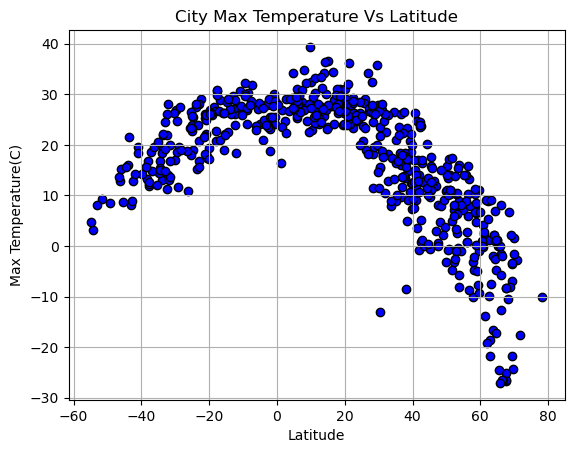

In [9]:
# Build scatter plot for latitude vs. temperature
#celsius= [ (temp - 273.15) for temp in city_data_df["Max Temp"]]
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Temperature Vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

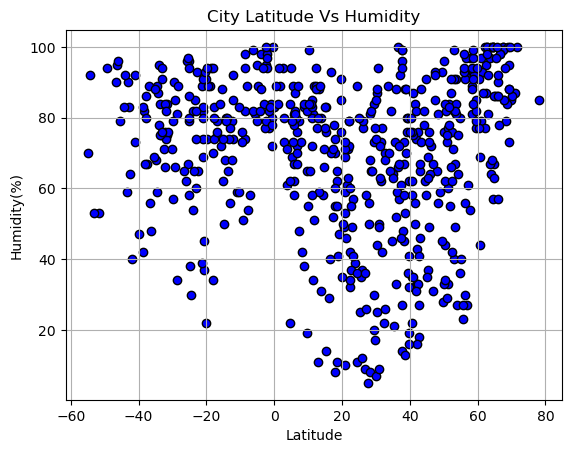

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

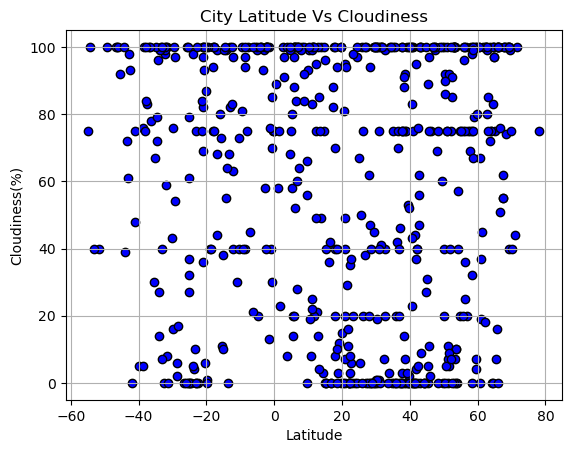

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

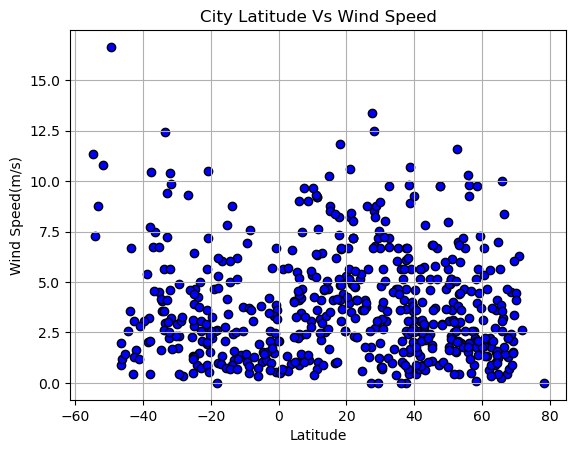

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude Vs Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots

def lin_reg(data_df, column):
    x_values = data_df["Lat"]
    y_values = data_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(column)
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abengourou,6.7297,-3.4964,27.10,72,100,2.35,CI,1712693879
1,whitehorse,60.7161,-135.0538,4.06,44,67,5.36,CA,1712693492
5,suruc,36.9761,38.4250,11.70,92,46,4.09,TR,1712693879
6,yellowknife,62.4560,-114.3525,1.16,95,100,2.13,CA,1712693723
7,smithers,54.7804,-127.1743,8.18,36,75,4.63,CA,1712693759


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,23.60,79,37,2.83,PN,1712693694
3,tolanaro,-25.0319,46.9987,23.88,96,61,3.93,MG,1712693858
4,codrington,-38.2667,141.9667,13.27,82,100,3.22,AU,1712693854
9,uturoa,-16.7333,-151.4333,28.88,75,99,6.02,PF,1712693723
10,port-aux-francais,-49.3500,70.2167,8.47,94,100,16.65,TF,1712693691


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8449410220106348


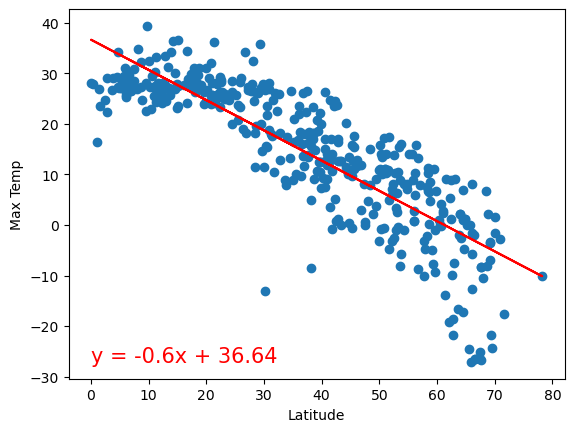

In [71]:
# Linear regression on Northern Hemisphere

lin_reg(data_df= northern_hemi_df, column= "Max Temp")


The r value is 0.7586347478841775


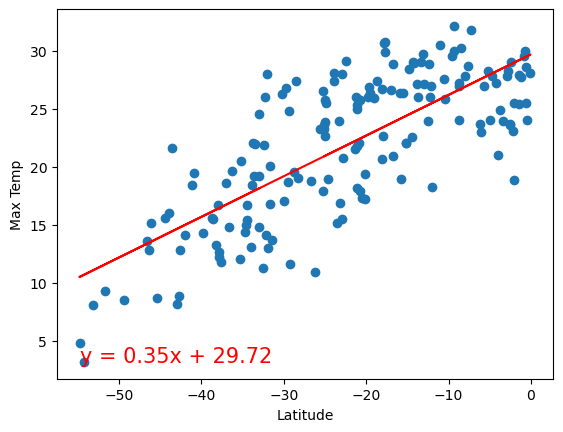

In [72]:
# Linear regression on Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Max Temp")


   **Discussion about the linear relationship:**The above plots are regression plots showing the relationship between latitude and temperature. These plots show that the further north you go away from the equator, the lower the temperature, that is the colder it gets.there is a strong negative correlation between temperature and latitude in the northern hemisphere as you move away from from the equator. For the southern Hemisphere, there is a strong positive correlation.The closer one is to the equator, the warmer it gets. The warmest temperatures are in locations that are on or near the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.22355089273586182


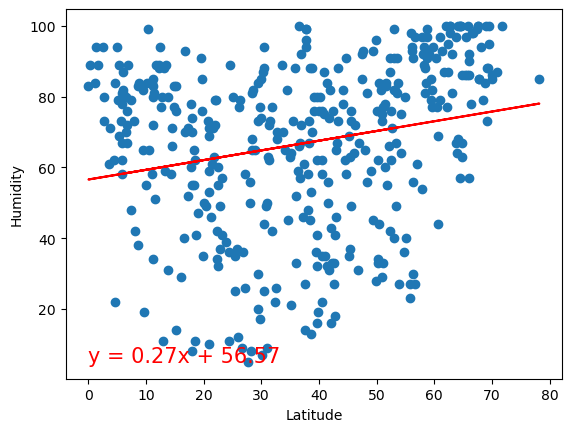

In [73]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Humidity")


The r value is 0.14681600538149406


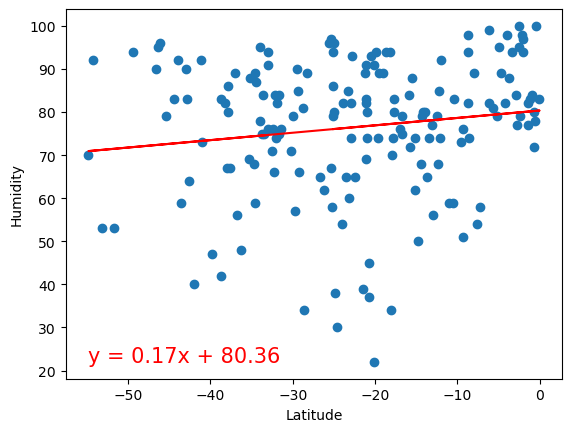

In [74]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Humidity")


**Discussion about the linear relationship:**The above plots are regression plots showing the relationship between latitude and humidity. These plots show that the amount of humidity increases slightly from the equator towards the north. The r value suggests a weakly positive correlation between latitude and humidity. The data are scattered all over the plot and suggests several other factors may be at play in determining humidity other than location(latitude).The second plot shows an almost horizontal linear regression plot. There is a very weakly positive correlation between humidity and latitude for the southern hemishere.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.08210012615373412


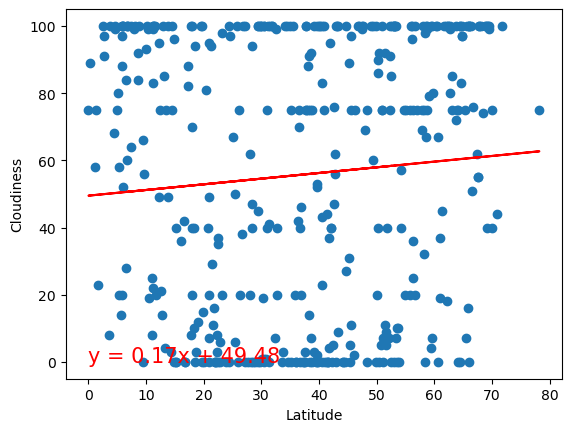

In [75]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Cloudiness")


The r value is 0.06941542959588382


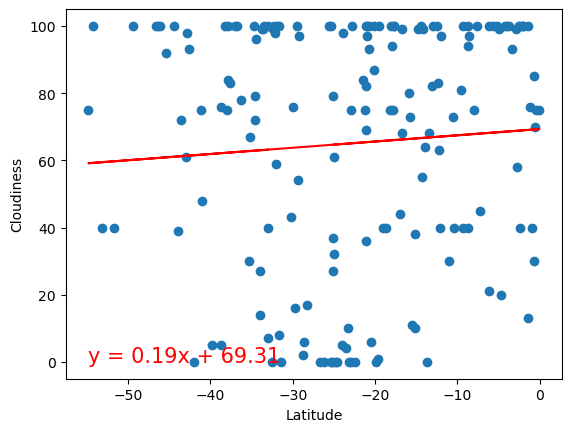

In [76]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Cloudiness")


**Discussion about the linear relationship:**The 2 plots above show relationship between latitude and cloudiness. For both northern and southern hemispheres, there is a very weakly positive relationship. Cloudiness may thus increase as you go further north but will usually not be the case.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.17040396194391683


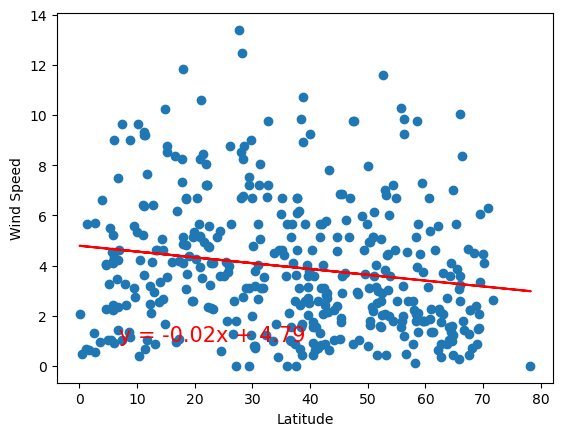

In [22]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Wind Speed")


The r value is -0.31604187345708473


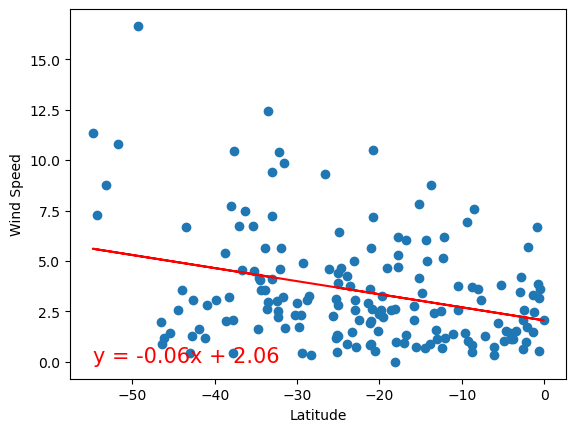

In [77]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Wind Speed")


**Discussion about the linear relationship:**These plot show the relationship between wind speed and latitude. there is a very weakly negative correlation between wind speed and latitude with an almost horizontal slope in the northern hemisphere and slightly stronger in the southern hemisphere. 